In [6]:
import pandas as pd
bikes=pd.read_csv('../train.csv', index_col='datetime',parse_dates=True)

In [20]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,temp_cut
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,"(0, 10]"
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,"(0, 10]"
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,"(0, 10]"
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,"(0, 10]"
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,"(0, 10]"


In [8]:
bikes.rename(columns={'count':'total'},inplace=1)

(array([   69.,   648.,  1440.,  1891.,  1587.,  1753.,  1901.,  1194.,
          355.,    48.]),
 array([  0.82 ,   4.838,   8.856,  12.874,  16.892,  20.91 ,  24.928,
         28.946,  32.964,  36.982,  41.   ]),
 <a list of 10 Patch objects>)

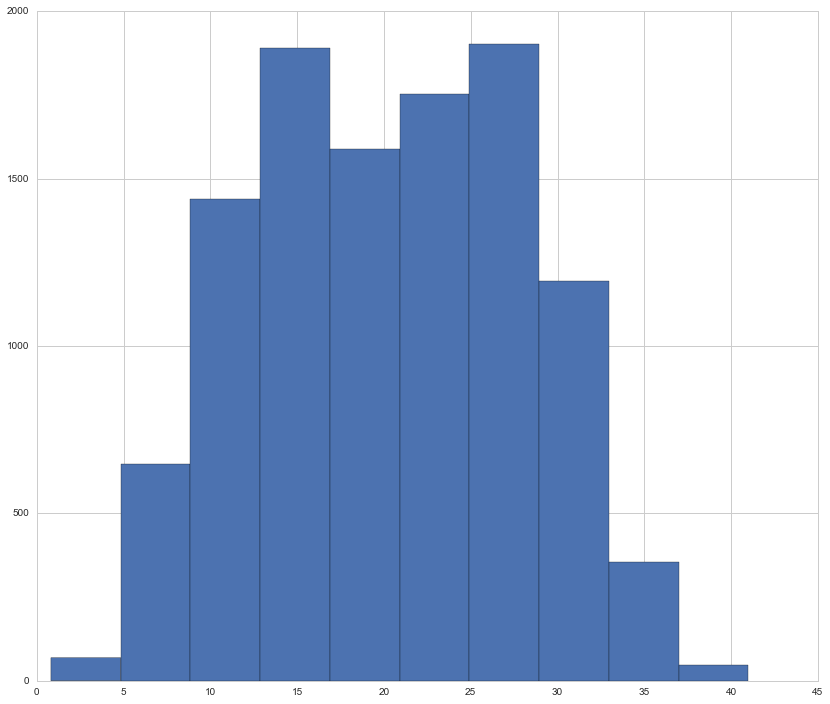

In [19]:
plt.hist(bikes['temp'])

In [21]:
bikes['hour']=bikes.index.hour
bikes['temp_cut']=pd.cut(bikes.temp,[0,15,30,41])

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

[<matplotlib.text.Text at 0x118132518>, <matplotlib.text.Text at 0x117cc8400>]

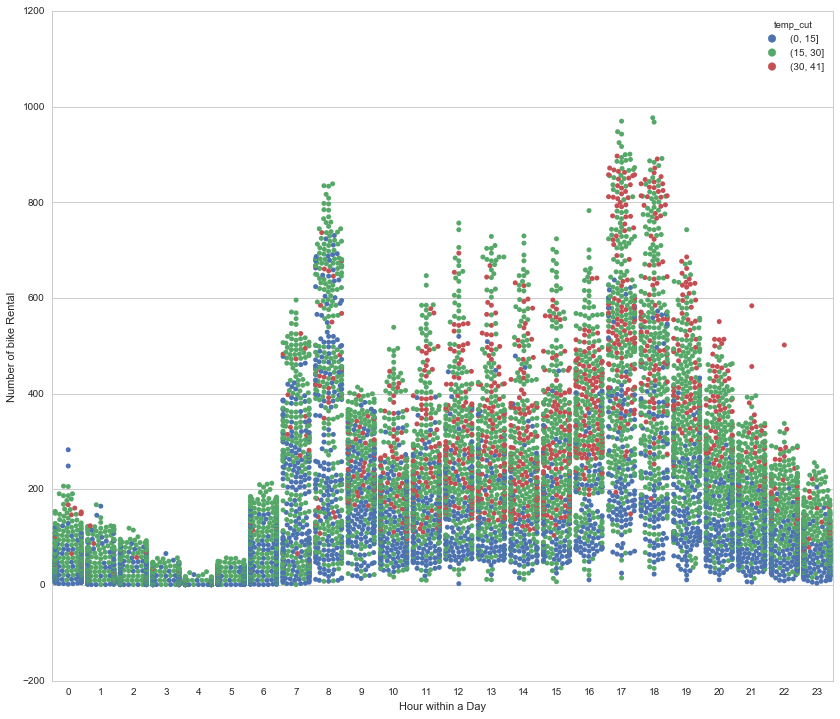

In [23]:
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='hour',y='total',hue='temp_cut',data=bikes)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")